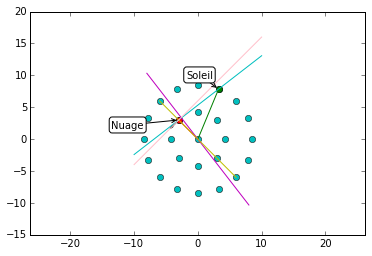

In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt 
from __future__ import division
from scipy import *           
import os


#Affichage des vitesses radiales en fonction des coordonnées du nuage de gaz:

def cercle (rayon,pas):
    R=rayon
    alpha=0
    delta=pas
    while alpha<2*np.pi:
        alpha=alpha+delta
        X=R*cos(alpha)
        Y=R*sin(alpha)
        plot(X,Y, 'co',)
          
plt.axis("equal")       
plt.plot(cercle(4.25,np.pi/4), cercle(8.5,np.pi/8))


RS=8.5
RN=4.25
alpha=np.pi/4
beta=np.pi/8

def xsoleil(t):
    x = RS*np.cos(beta*t)
    return x

def ysoleil(t):
    y = RS*np.sin(beta*t)
    return y

def xnuage(t):
    x = RN*np.cos(alpha*t)
    return x

def ynuage(t):
    y = RN*np.sin(alpha*t)
    return y


def vitesserad(t):
    plt.axis([-5,5,-5,5])
    
    #coordonnées du Soleil et du nuage de gaz:
    x1=xsoleil(t)
    y1=ysoleil(t)
    x2=xnuage(t)
    y2=ynuage(t)
    
    #affichage des astres à l'instant t:
    plt.plot(x1,y1,'ro',color="green")
    plt.plot(x2,y2,'ro')
    plt.plot(0,0,'co')

    plt.axis('equal')
    
    #relier centre galactique/Soleil:
    plt.plot([0,x1],[0,y1],'-')
    
    #relier centre galactique/nuage:
    plt.plot([0,x2],[0,y2],'-')
    
    #droite soleil/nuage:
    a=x2-x1
    b=y2-y1
    
    #forme : m*x+p
    m1=b/a
    p1=y1-m1*x1
    x = np.linspace(-10, 10, 20)
    fx=m1*x+p1
    plt.plot(x,fx)
    
    #tracer de la perpendiculaire
    xp = np.linspace(-6, 6, 20)
    xpr = np.linspace(-8, 8, 20)
    m2=-1/m1
    fxp=m2*xpr
    plt.plot(xpr,fxp)
    
    #distance jaune
    SN=sqrt((x1-0)**2+(y1-0)**2)
    #Xp=(-y1-m1*x1)/((b^2+a^2)/(a*b))
    #Yp=-(a/b)*(-y1-m1*x1)/((b^2+a^2)/(a*b))
    xP=((-b*a)/((a**2)+(b**2)))*(y1-x1*(b/a))
    yP=-(a/b)*xP
    #plt.plot(xP,yP,'ro')
    
    #point I
    #plt.plot(xP,y2,'ro')
    NI=sqrt((xP-x2)**2+(y2-y2)**2)
    IP=sqrt((xP-x2)**2+(yP-y2)**2)
    
    #point R
    #plt.plot((xP+NI),(yP+IP),'ro')
    
    #droite centre/soleil
    fx2=(x2/y2)*xp+y2-(x2/y2)*x2
    plt.plot(xp,fx2)
    
    #perpendiculaire passant par nuage:
    fx3=-(x2/y2)*x+(y2+(x2/y2)*x2)
    plt.plot(x,fx3,'-',color="pink")
    
    #FLECHE :
    xf=xnuage(t+1)
    yf=ynuage(t+1)
    
    if (t>=0 and t<=2) or (t>=6 and t<=7) :
        mf2=-(x2/y2)
        mf1=1  
    else:
        mf2=(x2/y2)
        mf1=-1



    
    
    ax = plt.axes()
    ax.arrow(x2, y2, mf1, mf2, head_width=0.2, head_length=0.5, fc='k', ec='k')
    
    annotate("Soleil", xy=(x1,y1), xycoords="data",
                  xytext=(x1-3,y1+3),
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    annotate("Nuage", xy=(x2,y2), xycoords="data",
                  xytext=(x2-8,y2),
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"))
    


vitesserad(3)
plt.show()
